## Lab | Customer Analysis Round 3

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.
Get the data
Use the same jupyter file from the last lab, Customer Analysis Round 3
EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
* Show DataFrame info.
* Describe DataFrame.
* Show a plot of the total number of responses broken down by response kind.
* Show a plot of the number of responses by the sales channel.
* Show a plot of the distribution of the total claim amount, broken down by response kind. Try a boxplot and distribution plot, for each response kind. For the distribution plot, try to plot both kinds of responses in one chart (you can try with seaborn's histplot, using the hue parameter).
* Create similar plots like in the task before, but for Income
* NEW: Create a scatterplot between total claim amount and income. Play around with the parameters of the scatterplot (markersize? alpha?) and try to identify more features within the data just visually. You can also try different seaborn plots. Check to find suitable ones: https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

In [19]:
import pandas as pd
import numpy as np

In [6]:
mca2 = pd.read_csv('marketing_customer_analysis_CLEAN.csv')

### Show DataFrame info

In [7]:
mca2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9134 non-null   int64  
 1   customer                       9134 non-null   object 
 2   state                          9134 non-null   object 
 3   customer_lifetime_value        9134 non-null   float64
 4   response                       9134 non-null   object 
 5   coverage                       9134 non-null   object 
 6   education                      9134 non-null   object 
 7   effective_to_date              9134 non-null   object 
 8   employmentstatus               9134 non-null   object 
 9   gender                         9134 non-null   object 
 10  income                         9134 non-null   int64  
 11  location_code                  9134 non-null   object 
 12  marital_status                 9134 non-null   o

In [14]:
mca2.head()

,Unnamed: 0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,0,BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize,2
1,1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize,1
2,2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2/19/11,Employed,F,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize,2
3,3,WW63253,California,7645.86,No,Basic,Bachelor,1/20/11,Unemployed,M,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize,1
4,4,HB64268,Washington,2813.69,No,Basic,Bachelor,2/3/11,Employed,M,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize,2


### Describe DataFrame

In [12]:
mca2 = mca2.round(2)

In [16]:
mca2.describe().round(2)

#rounded the numbers to see better

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,4566.50,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09,1.46
std,2636.90,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50,0.50
min,0.00,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10,1.00
25%,2283.25,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26,1.00
50%,4566.50,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.94,1.00
75%,6849.75,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.52,2.00
max,9133.00,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24,2.00


In [20]:
mca2.describe(include=[np.object])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,MP48946,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


we can see that there are categorical and numercial data types within the columns

### Show a plot of the total number of responses broken down by response kind.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

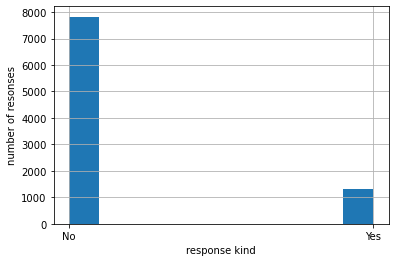

In [110]:
mca2['response'].hist()
plt.xlabel('response kind')
plt.ylabel('number of resonses')
plt.show()

### Show a plot of the number of responses by the sales channel.

In [114]:
mca2 = mca2.drop(['respons_yes'])

KeyError: "['respons_yes'] not found in axis"

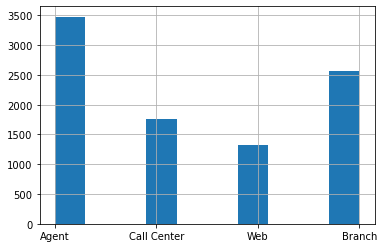

In [44]:
mca2['sales_channel'].hist()
plt.show()

#### Show a plot of the distribution of the total claim amount, broken down by response kind
Try a boxplot and distribution plot, for each response kind.
<br>
For the distribution plot, try to plot both kinds of responses in one chart (you can try with seaborn's histplot, using the hue parameter).

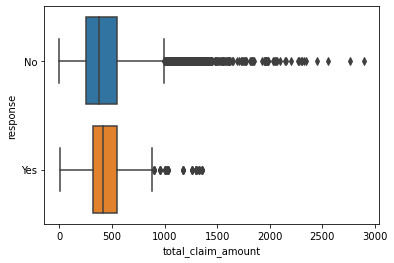

In [62]:
sns.boxplot(y = 'response',x='total_claim_amount', data=mca2)
plt.show()

In [ ]:
sns.histplot(x='total_claim_amount', data=mca2, hue='response')
sns.titel('Test')

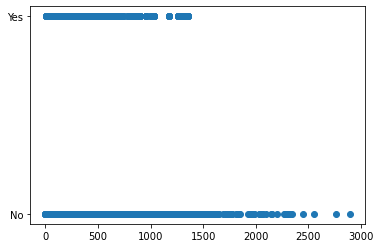

In [53]:
plt.scatter(x=mca2['total_claim_amount'], y=mca2['response'])
plt.show()

#### History Plots in seaborn
https://seaborn.pydata.org/generated/seaborn.histplot.html

Text(0.5, 1.0, 'test')

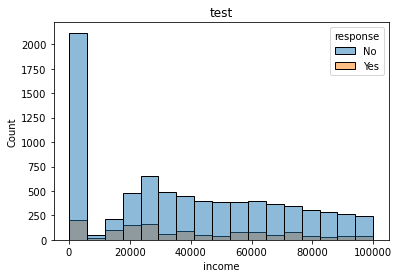

In [105]:
sns.histplot(x='income', data=mca2, hue='response')
plt.title('test')

#### Create similar plots like in the task before, but for Income

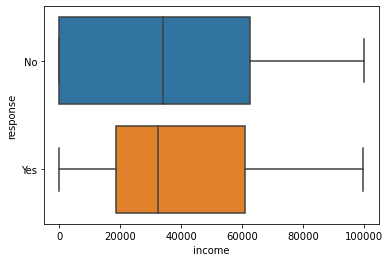

In [67]:
sns.boxplot(y = 'response',x='income', data=mca2)
plt.show()

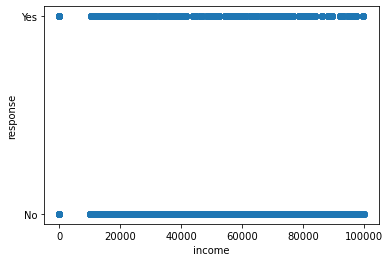

In [108]:
plt.scatter(x=mca2['income'], y=mca2['response'])
plt.xlabel('income')
plt.ylabel('response')
plt.show()

#### NEW: Create a scatterplot between total claim amount and income. 
Play around with the parameters of the scatterplot (markersize? alpha?) and try to identify more features within the data just visually. 
<br>
You can also try different seaborn plots. 

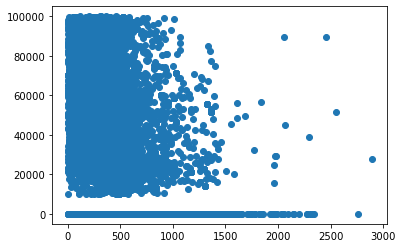

In [90]:
plt.scatter('total_claim_amount', 'income', data=mca2)
plt.show()

#### Transparency & Color

alpha - transparency e.g. 0.05
<br>
color - change color e.g. "purple"

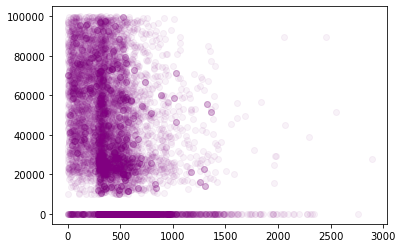

In [97]:
plt.scatter('total_claim_amount', 'income', data=mca2, alpha=0.05, color="purple")
plt.show()

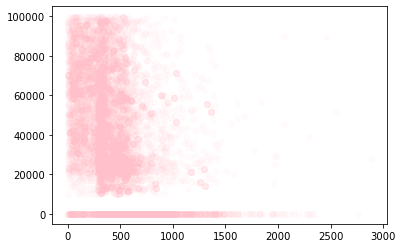

In [98]:
plt.scatter('total_claim_amount', 'income', data=mca2, alpha=0.05, color="pink")
plt.show()

#### 2D Density

- cmap - colors: "Greens", "Reds", etc.
<br>
- shade - with shade (=True) or not (=False)

<AxesSubplot:xlabel='total_claim_amount', ylabel='income'>

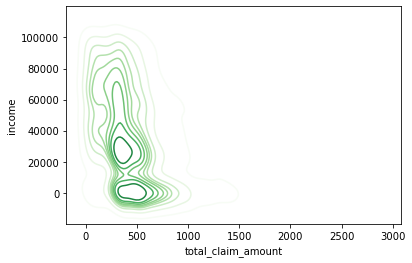

In [101]:
sns.kdeplot(data=mca2, x="total_claim_amount", y="income", cmap="Greens", shade=False)

#### Jitter
to see distributine better when having overlapping data points

use sns.stripplot()

KeyboardInterrupt: 

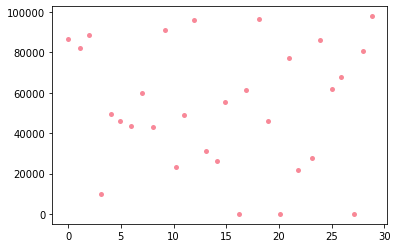

In [103]:
sns.stripplot(data=mca2, x="total_claim_amount", y="income", jitter=0.2)
plt.show()

#### Titels

- plt.title('titel', loc = left or right oder centre)
- plt.xlabel('Value of X')
- plt.ylabel('Value of Y')